In [1]:
# import important libraries: Standard
import pandas as pd 
import numpy as np
import datetime
import warnings

# Import libraries: Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import libraries: Sk-learn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.scorer import make_scorer
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Pretty display for notebooks
%matplotlib inline
####
warnings.filterwarnings("ignore")

In [2]:
# load all the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')

In [3]:
print('Shape:',train.shape)
train.head()

Shape: (421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
#there are 99 departments
train['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65], dtype=int64)

In [5]:
print('Shape:',test.shape)
test.head()

Shape: (115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [6]:
print('Shape:',stores.shape)
stores.head()

Shape: (45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
print('Shape: ', features.shape)
features.head()

Shape:  (8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
#Let's Observe our datasets

In [9]:
#There are 45 stores 
train['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [10]:
#Types of stores and their count 
stores['Type'].value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

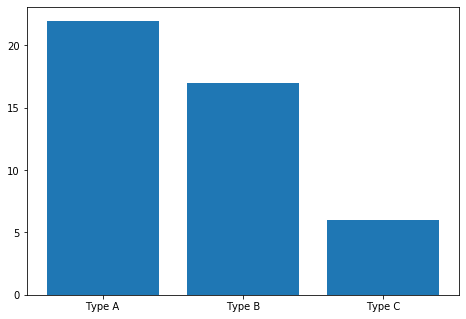

In [11]:
#visualize store type and their count

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
types = ['Type A', 'Type B', 'Type C']
count = [22, 17, 6]
ax.bar(types,count)
plt.show()

In [12]:
#Type A has largest numbers and C less

In [13]:
#Now let's look at the train data

In [14]:
print("train shape: ", train.shape)
train.head(3)

train shape:  (421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False


In [15]:
#weekly sales are given in train data. 
#visulize weekly sales in the three types of stores

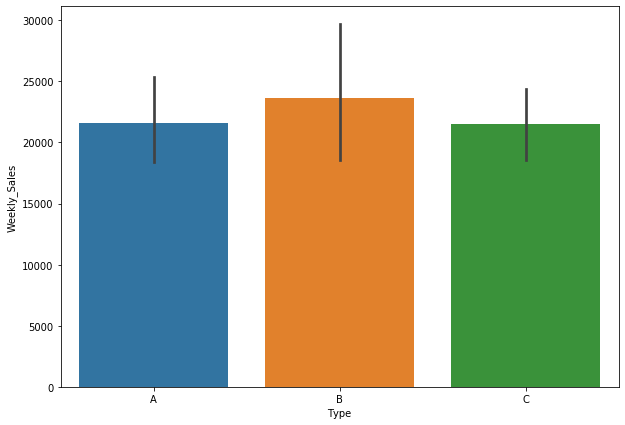

In [16]:
S_sale = pd.concat([stores['Type'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(10,7))
fig = sns.barplot(x = 'Type', y = 'Weekly_Sales', data = S_sale)


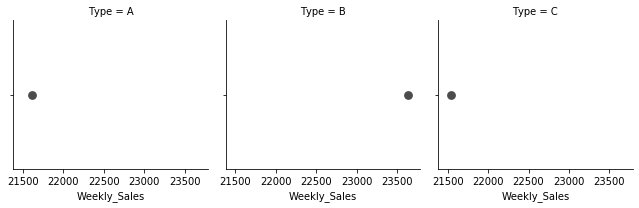

In [17]:
g = sns.FacetGrid(S_sale, col="Type", col_wrap=3, height=3)
g.map(sns.pointplot, "Weekly_Sales", color=".3", ci=None);

In [18]:
#largest Weekly sales in store type B and smallest in type C. 

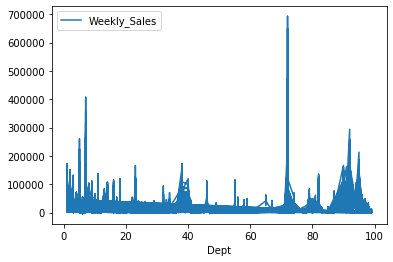

In [19]:
train.plot(x  = 'Dept', y = 'Weekly_Sales')

In [20]:
#largest Weekly sales b/n Dept 60 and 80

In [21]:
#How weekly sales is affected by product and IsHoliday?
#let's visualize the effects of IsHoliday in weekly sales 

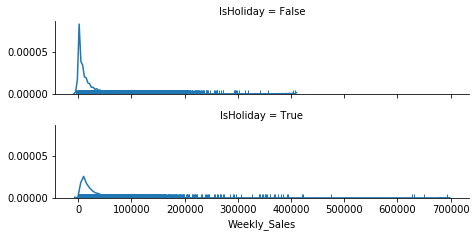

In [22]:
g = sns.FacetGrid(train, row="IsHoliday",
                  height=1.7, aspect=4,)
g.map(sns.distplot, "Weekly_Sales", hist=False, rug=True);


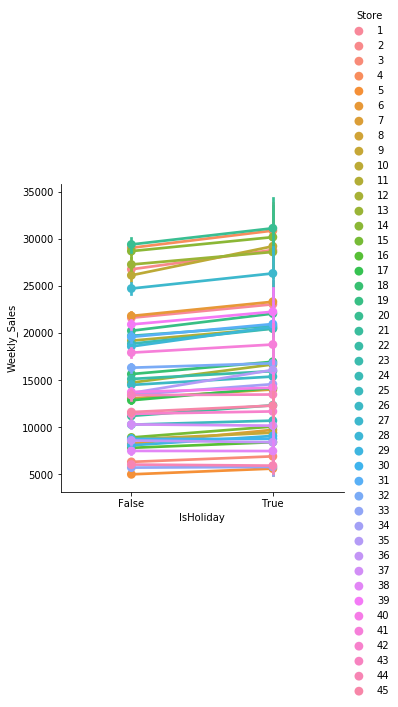

In [23]:
sns.factorplot(data= train, 
               x= 'IsHoliday',
               y= 'Weekly_Sales',
               hue= 'Store');

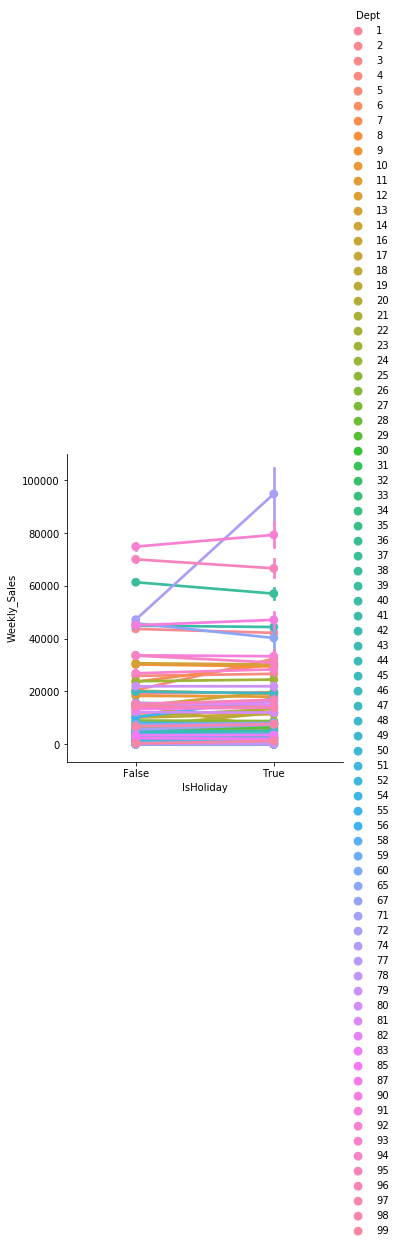

In [24]:
sns.factorplot(data= train, 
               x= 'IsHoliday',
               y= 'Weekly_Sales',
               hue= 'Dept');

In [25]:
#largest Weekly sales when Is IsHoliday is True for most Stores and Dept

Let's Work on the features(ADVANCE THE FEATURES)

In [26]:
#Shape of the features
features.shape

(8190, 12)

In [27]:
#Advance the features for better score 
#split the date into date,week,month,year and day

In [28]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [29]:
train['Week'] = train['Date'].dt.week
test['Week'] = test['Date'].dt.week

In [30]:
train['Month'] = train['Date'].dt.month
test['Month'] = test['Date'].dt.month

In [31]:
train['Year'] = train['Date'].dt.year
test['Year'] = test['Date'].dt.year

In [32]:
train['Day'] = train['Date'].dt.day
test['Day'] = test['Date'].dt.day

Merge All Features

In [33]:
#Drop the IsHoliday column in train & test since it is dublicated in features
New_train = train.drop(columns=['IsHoliday'])
New_test = test.drop(columns=['IsHoliday'])

features['Date'] = pd.to_datetime(features['Date'])

#merge all the features
New_train_features = pd.merge_asof(New_train, features, on='Store',by='Date')
New_test_features= pd.merge_asof(New_test, features, on='Store',by='Date')
print(New_train_features.shape, New_test_features.shape)

(421570, 18) (115064, 17)


In [34]:
New_train_features.head(3)

,Store,Dept,Date,Weekly_Sales,Week,Month,Year,Day,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,2010-02-05,24924.50,5,2,2010,5,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,6,2,2010,12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,7,2,2010,19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [35]:
New_test_features.head(3)

,Store,Dept,Date,Week,Month,Year,Day,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,2012-11-02,44,11,2012,2,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False
1,1,1,2012-11-09,45,11,2012,9,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False
2,1,1,2012-11-16,46,11,2012,16,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False


In [36]:
#merge all the features
New_train_features = pd.merge(New_train_features,stores)
New_test_features = pd.merge(New_test_features,stores)
print(New_train_features.shape,New_test_features.shape)

(421570, 20) (115064, 19)


In [37]:
New_train_features.head(3)

,Store,Dept,Date,Weekly_Sales,Week,Month,Year,Day,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,5,2,2010,5,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,6,2,2010,12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,7,2,2010,19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315


In [38]:
New_test_features.head(3)

,Store,Dept,Date,Week,Month,Year,Day,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2012-11-02,44,11,2012,2,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315
1,1,1,2012-11-09,45,11,2012,9,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False,A,151315
2,1,1,2012-11-16,46,11,2012,16,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False,A,151315


In [39]:
#Function to change the IsHoliday column values to numerical 

def Is_holi_conv(is_holi):
    if is_holi == True:
        return 1
    else:
        return 0

#Change the train data
act_val = New_train_features['IsHoliday']
new_val = act_val.map(Is_holi_conv)
New_train_features['IsHoliday'] = new_val


#Change the test data

act_val = New_test_features['IsHoliday']
new_val = act_val.map(Is_holi_conv)
New_test_features['IsHoliday'] = new_val

In [40]:
#Function to change the Type column values to numerical
def type_conv(store_type):    
    if store_type == 'A':
        return 1
    elif store_type == 'B':
        return 2
    return 3

#Change the train data
act_train_type_val = New_train_features['Type']
new_train_type_val = act_train_type_val.map(type_conv)
New_train_features['Types'] = new_train_type_val

#Change the test data
act_test_type_val = New_test_features['Type']
new_test_type_val = act_test_type_val.map(type_conv)
New_test_features['Types'] = new_test_type_val

New_train_features=New_train_features.drop(['Type'], axis=1)
New_test_features=New_test_features.drop(['Type'], axis=1)

In [41]:
print("Shape: ", New_train_features.shape)
New_train_features.head(3)

Shape:  (421570, 20)


,Store,Dept,Date,Weekly_Sales,Week,Month,Year,Day,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Types
0,1,1,2010-02-05,24924.50,5,2,2010,5,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,1
1,1,1,2010-02-12,46039.49,6,2,2010,12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,151315,1
2,1,1,2010-02-19,41595.55,7,2,2010,19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,151315,1


In [42]:
print("Shape: ", New_test_features.shape)
New_test_features.head(3)

Shape:  (115064, 19)


,Store,Dept,Date,Week,Month,Year,Day,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Types
0,1,1,2012-11-02,44,11,2012,2,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315,1
1,1,1,2012-11-09,45,11,2012,9,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,0,151315,1
2,1,1,2012-11-16,46,11,2012,16,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,0,151315,1


Treating Missing Values

In [43]:
#fill empty values with zero
New_train_features=New_train_features.fillna(0)
New_test_features=New_test_features.fillna(0)

In [44]:
#For better score, Find the mean of CPI.
New_train_features['Mean_CPI'] = New_train_features['CPI'].mean() 
New_test_features['Mean_CPI'] = New_test_features['CPI'].mean()
features_drop=['CPI']
train_final=New_train_features.drop(features_drop, axis=1)
test_final=New_test_features.drop(features_drop, axis=1)
print(train_final.shape, test_final.shape)
train_final.head(3)

(421570, 20) (115064, 19)


,Store,Dept,Date,Weekly_Sales,Week,Month,Year,Day,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,IsHoliday,Size,Types,Mean_CPI
0,1,1,2010-02-05,24924.50,5,2,2010,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,0,151315,1,171.201947
1,1,1,2010-02-12,46039.49,6,2,2010,12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,1,151315,1,171.201947
2,1,1,2010-02-19,41595.55,7,2,2010,19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,0,151315,1,171.201947


In [45]:
#Analyze Feature Correlation

[]

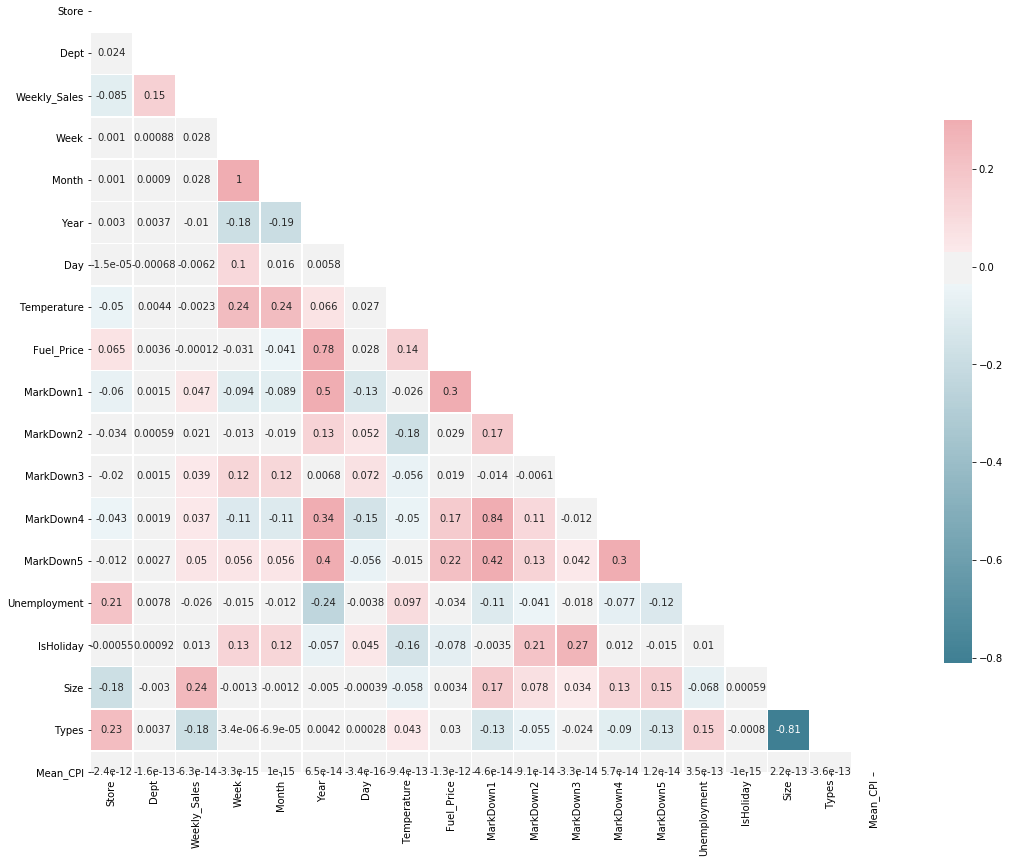

In [46]:
#Visualize Correlation in train dataset
Correlation = train_final.corr()
mask = np.zeros_like(Correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(18, 20))
sns.heatmap(Correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.plot()

[]

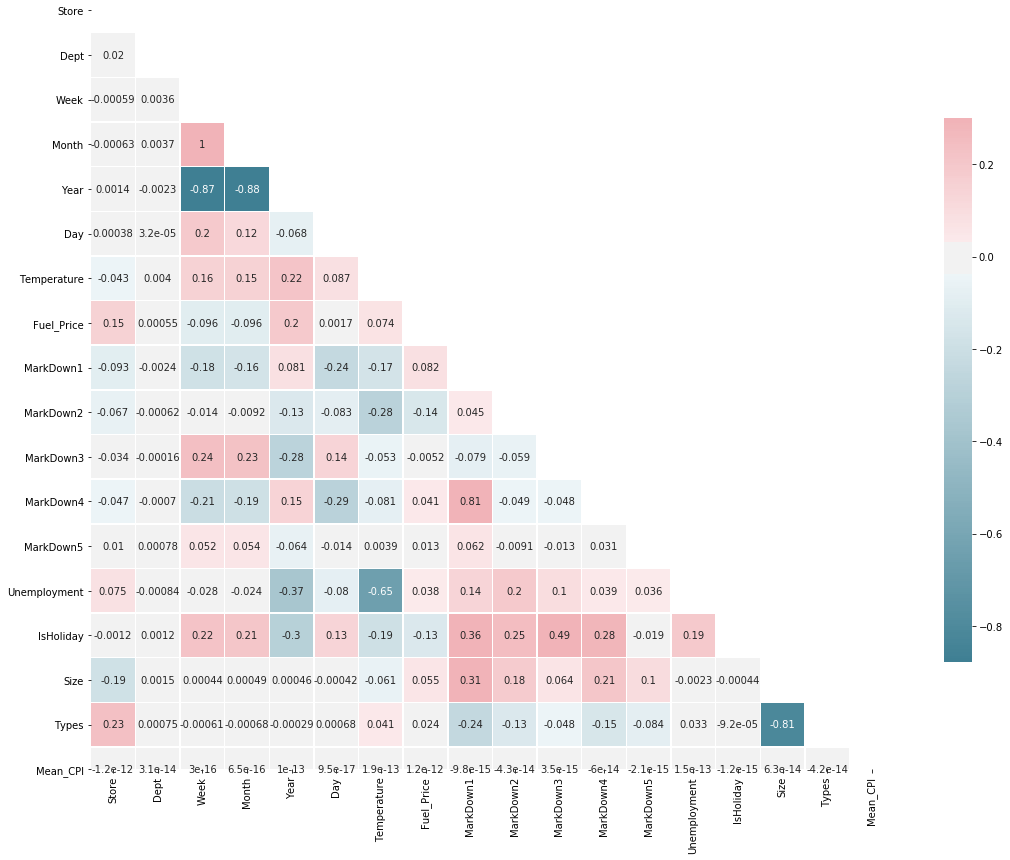

In [47]:
#Visualize Correlation in test dataset
Correlation = test_final.corr()
mask = np.zeros_like(Correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(18, 20))
sns.heatmap(Correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.plot()

In [48]:
#Define 

In [49]:
#### train_X is everything except Weekly_Sales
train_X=train_final.drop(['Weekly_Sales','Date'], axis=1)


#### train_Y is Only Weekly_Sales 
train_y=train_final['Weekly_Sales'] 
test_X=test_final.drop('Date',axis=1).copy()

train_X.shape, train_y.shape, test_X.shape

((421570, 18), (421570,), (115064, 18))

Select Model And Model Evaluation 

In [50]:
#In the test dataset weekly seals are not given therefor model selection we split the tarin
#dataset for trainig and validation 

# Split final train for training and validation
# 80% training and 20% test(1/5th of the detaset)
X_train, X_vali, y_train, y_vali = train_test_split(train_X, train_y, test_size=0.2, random_state=1)

Train Accuracy for  LinearRegression 8.638
Validation Accuracy for  LinearRegression 8.872
Mean Absolute Error for LinearRegression 14581.6
Mean Squared Error for LinearRegression 471705757.986
Root Mean Squared Error for LinearRegression 21718.788


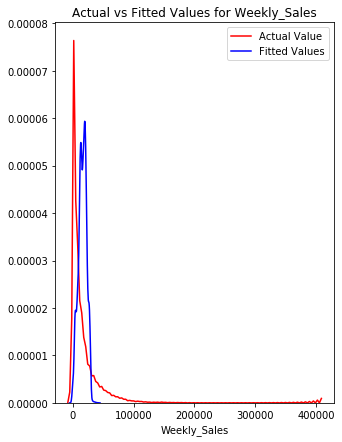

Train Accuracy for  RandomForestRegressor 99.661
Validation Accuracy for  RandomForestRegressor 97.897
Mean Absolute Error for RandomForestRegressor 1332.667
Mean Squared Error for RandomForestRegressor 10884298.691
Root Mean Squared Error for RandomForestRegressor 3299.136


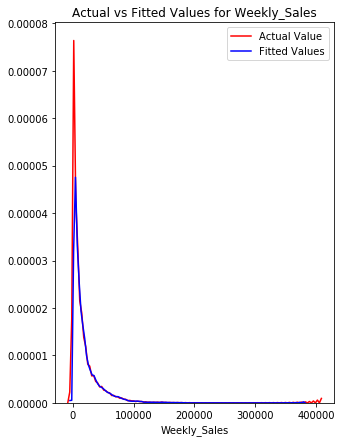

In [51]:
# Initialize base models
Model_1 = LinearRegression()
Model_2 = RandomForestRegressor(n_estimators=50)


for model in [Model_1,Model_2]:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    pred_y=model.predict(X_vali)
    accuracy_train= round(model.score(X_train, y_train) * 100,3)
    accuracy_validation= round(model.score(X_vali, y_vali) * 100,3)
    print ("Train Accuracy for ",model_name, accuracy_train)
    print ("Validation Accuracy for ",model_name, accuracy_validation)
    print("Mean Absolute Error for",model_name, round(metrics.mean_absolute_error(y_vali, pred_y),3))
    print("Mean Squared Error for", model_name, round(metrics.mean_squared_error(y_vali, pred_y),3))
    print("Root Mean Squared Error for", model_name, round(np.sqrt(metrics.mean_squared_error(y_vali, pred_y)),3))
    #visualize the difference between the actual and the predicted value
    plt.figure(figsize=(5, 7))
    ax = sns.distplot(y_vali, hist=False, color="red", label="Actual Value")
    sns.distplot(pred_y, hist=False, color="blue", label="Fitted Values" , ax=ax)
    plt.title('Actual vs Fitted Values for Weekly_Sales')
    plt.show()
    plt.close()



The RandomForestRegressor has better accuracy. 

Train Our Model

In [52]:
#For the final train, let's set n_estimators to 100
rf_model = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=0, warm_start=False)
rf_model.fit(train_X, train_y)
y_pred=rf_model.predict(test_X)
accuracy= round(rf_model.score(X_train, y_train) * 100,3)
print ("Accuracy",accuracy)

Accuracy 99.7


Prediction

In [53]:
submission = pd.DataFrame({
    "Id": test.Store.astype(str)+'_'+test.Dept.astype(str)+'_'+test.Date.astype(str),
    "Weekly_Sales": y_pred
    })
submission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,33265.9554
1,1_1_2012-11-09,23834.4668
2,1_1_2012-11-16,17764.6516
3,1_1_2012-11-23,19993.3156
4,1_1_2012-11-30,26925.7791


Final Submition 

In [57]:
submission.to_csv('submission.csv',sep=',', encoding='utf-8', index=False)
submission

,Id,Weekly_Sales
0,1_1_2012-11-02,33265.9554
1,1_1_2012-11-09,23834.4668
2,1_1_2012-11-16,17764.6516
3,1_1_2012-11-23,19993.3156
4,1_1_2012-11-30,26925.7791
5,1_1_2012-12-07,52710.3762
6,1_1_2012-12-14,39700.4215
7,1_1_2012-12-21,58111.5433
8,1_1_2012-12-28,20745.8229
9,1_1_2013-01-04,18978.5696
